In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/Aayushi/Desktop/Data Science/CSV files/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [194]:
df.shape

(5110, 12)

In [3]:
df.isnull().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
X=df.drop(['stroke'],axis=1)
Y=df[['stroke']]

In [13]:
X.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [14]:
Y.columns

Index(['stroke'], dtype='object')

In [16]:
from sklearn.impute import SimpleImputer
si=SimpleImputer()

In [17]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [18]:
si=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [20]:
num1=pd.DataFrame(si.fit_transform(num),index=num.index,columns=num.columns)

In [21]:
num1.isnull().mean()

id                   0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  0.0
dtype: float64

In [22]:
char.isnull().mean()

gender            0.0
ever_married      0.0
work_type         0.0
Residence_type    0.0
smoking_status    0.0
dtype: float64

In [26]:
X=pd.concat([num1,char],axis=1)
X.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,9046.0,67.0,0.0,1.0,228.69,36.6,Male,Yes,Private,Urban,formerly smoked
1,51676.0,61.0,0.0,0.0,202.21,28.7,Female,Yes,Self-employed,Rural,never smoked
2,31112.0,80.0,0.0,1.0,105.92,32.5,Male,Yes,Private,Rural,never smoked
3,60182.0,49.0,0.0,0.0,171.23,34.4,Female,Yes,Private,Urban,smokes
4,1665.0,79.0,1.0,0.0,174.12,24.0,Female,Yes,Self-employed,Rural,never smoked


In [27]:
X.isnull().mean()

id                   0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  0.0
gender               0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
smoking_status       0.0
dtype: float64

In [28]:
df_new=pd.concat([X,Y],axis=1)

In [29]:
df_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.6,Male,Yes,Private,Urban,formerly smoked,1
1,51676.0,61.0,0.0,0.0,202.21,28.7,Female,Yes,Self-employed,Rural,never smoked,1
2,31112.0,80.0,0.0,1.0,105.92,32.5,Male,Yes,Private,Rural,never smoked,1
3,60182.0,49.0,0.0,0.0,171.23,34.4,Female,Yes,Private,Urban,smokes,1
4,1665.0,79.0,1.0,0.0,174.12,24.0,Female,Yes,Self-employed,Rural,never smoked,1


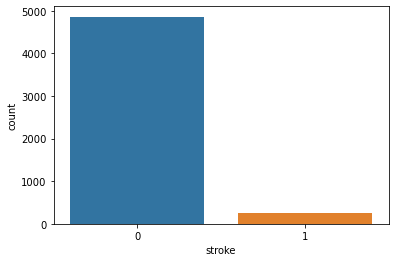

In [31]:
sns.countplot(x='stroke',data=df_new)

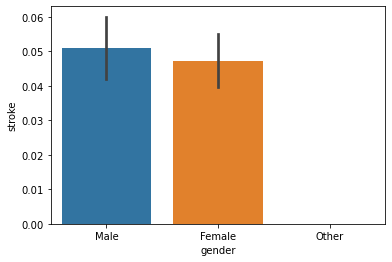

In [30]:
sns.barplot(x='gender',y='stroke',data=df_new)

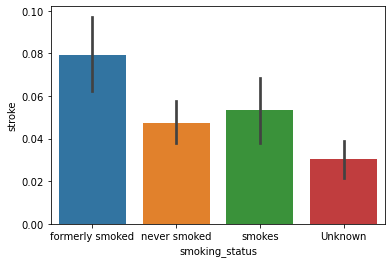

In [34]:
sns.barplot(x='smoking_status',y='stroke',data=df_new)

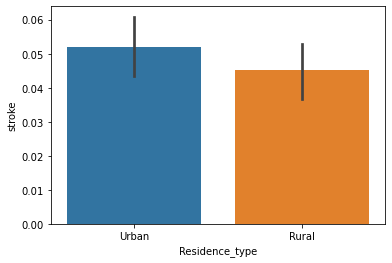

In [33]:
sns.barplot(x='Residence_type',y='stroke',data=df_new)

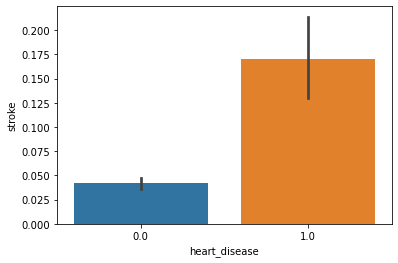

In [35]:
sns.barplot(x='heart_disease',y='stroke',data=df_new)

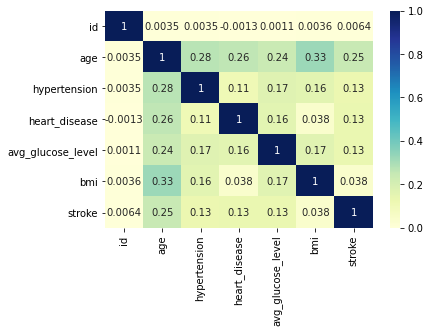

In [43]:
sns.heatmap(df_new.corr(),cmap='YlGnBu',annot=True)

In [49]:
df_new.describe([0.01,0.1,0.15,0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.75,0.99])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.885636,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698109,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
1%,724.270000,1.080000,0.000000,0.000000,56.330900,15.109000,0.000000
10%,6972.500000,11.000000,0.000000,0.000000,65.789000,19.890000,0.000000
15%,10649.700000,16.000000,0.000000,0.000000,70.117000,21.400000,0.000000
20%,14160.600000,20.000000,0.000000,0.000000,73.760000,22.700000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
30%,21968.400000,30.000000,0.000000,0.000000,80.038000,24.800000,0.000000


In [47]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.01))
    x=x.clip(lower=x.quantile(0.99))
    return(x)

In [48]:
num1=num1.apply(lambda x:outlier_cap(x))

In [53]:
num1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,724.27,1.08,0.0,0.0,56.3309,15.109
1,724.27,1.08,0.0,0.0,56.3309,15.109
2,724.27,1.08,0.0,0.0,56.3309,15.109
3,724.27,1.08,0.0,0.0,56.3309,15.109
4,724.27,1.08,0.0,0.0,56.3309,15.109


In [50]:
num1.describe([0.01,0.1,0.15,0.2,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.75,0.99])

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5.110000e+03,5.110000e+03,5110.0,5110.0,5.110000e+03,5.110000e+03
mean,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
std,1.705469e-11,5.596072e-14,0.0,0.0,8.029919e-13,1.739224e-12
min,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
1%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
10%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
15%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
20%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
25%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01
30%,7.242700e+02,1.080000e+00,0.0,0.0,5.633090e+01,1.510900e+01


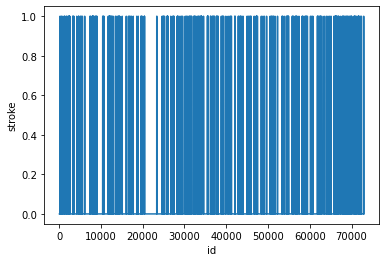

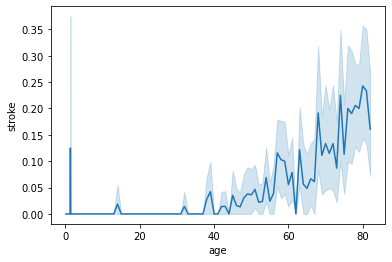

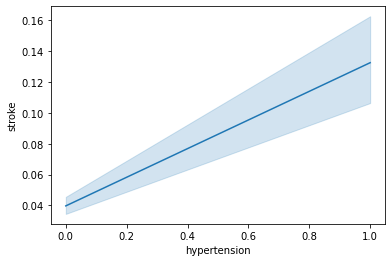

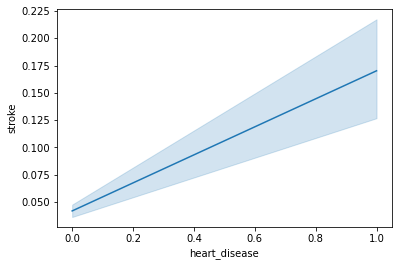

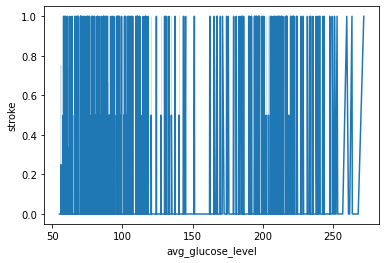

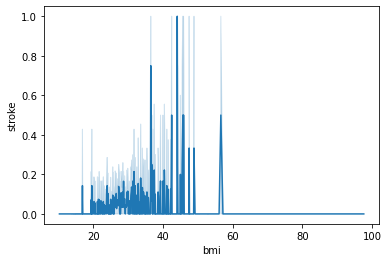

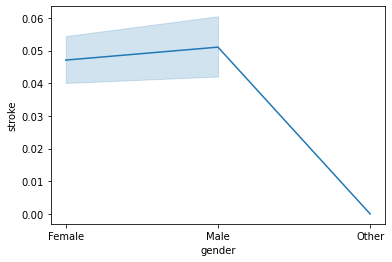

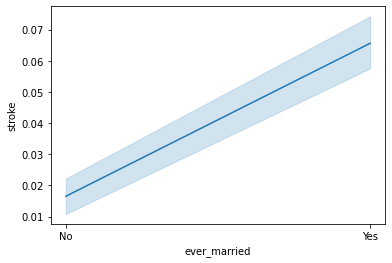

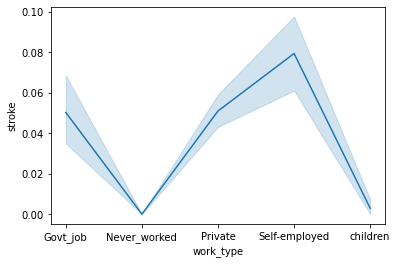

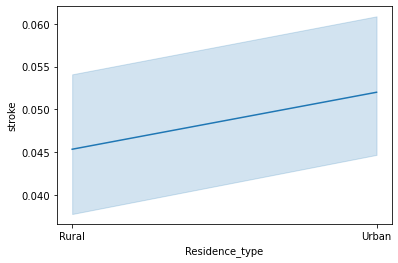

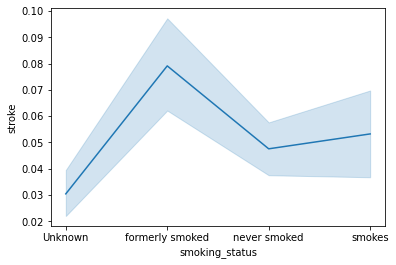

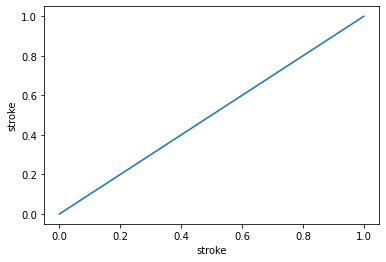

In [55]:
from numpy import mean
for col in df_new.columns:
    plt.figure()
    ax=sns.lineplot(x=col,y='stroke',data=df_new,estimator=mean)
    plt.show()



In [56]:
char.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [57]:
char['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [58]:
df_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.6,Male,Yes,Private,Urban,formerly smoked,1
1,51676.0,61.0,0.0,0.0,202.21,28.7,Female,Yes,Self-employed,Rural,never smoked,1
2,31112.0,80.0,0.0,1.0,105.92,32.5,Male,Yes,Private,Rural,never smoked,1
3,60182.0,49.0,0.0,0.0,171.23,34.4,Female,Yes,Private,Urban,smokes,1
4,1665.0,79.0,1.0,0.0,174.12,24.0,Female,Yes,Self-employed,Rural,never smoked,1


In [59]:
df_new['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [60]:
df_new['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [61]:
df_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.6,Male,Yes,Private,Urban,formerly smoked,1
1,51676.0,61.0,0.0,0.0,202.21,28.7,Female,Yes,Self-employed,Rural,never smoked,1
2,31112.0,80.0,0.0,1.0,105.92,32.5,Male,Yes,Private,Rural,never smoked,1
3,60182.0,49.0,0.0,0.0,171.23,34.4,Female,Yes,Private,Urban,smokes,1
4,1665.0,79.0,1.0,0.0,174.12,24.0,Female,Yes,Self-employed,Rural,never smoked,1


In [62]:
df_new=df_new.drop(['id'],axis=1)


In [63]:
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,0.0,1.0,228.69,36.6,Male,Yes,Private,Urban,formerly smoked,1
1,61.0,0.0,0.0,202.21,28.7,Female,Yes,Self-employed,Rural,never smoked,1
2,80.0,0.0,1.0,105.92,32.5,Male,Yes,Private,Rural,never smoked,1
3,49.0,0.0,0.0,171.23,34.4,Female,Yes,Private,Urban,smokes,1
4,79.0,1.0,0.0,174.12,24.0,Female,Yes,Self-employed,Rural,never smoked,1


In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [86]:
df_new=pd.get_dummies(df_new)

In [87]:
df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,202.21,28.7,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [88]:
x=df_new.drop(['stroke'],axis=1)
y=df_new[['stroke']]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [93]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3897,4.0,0.0,0.0,90.42,16.2,0,1,0,1,0,...,0,0,0,1,1,0,1,0,0,0
576,29.0,0.0,0.0,207.58,22.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4013,44.0,1.0,0.0,91.28,26.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4536,68.0,1.0,0.0,150.74,40.3,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1180,62.0,0.0,0.0,82.57,36.0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [94]:
y_train

,stroke
3897,0
576,0
4013,0
4536,0
1180,0
...,...
4426,0
466,0
3092,0
3772,0


In [170]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="gini", max_depth=4)


In [172]:
dc=dc.fit(X_train,y_train)

In [173]:
y_pred=dc.predict(X_test)

In [174]:
dc.score(X_train,y_train)

0.9575062901873078

In [175]:
y_pred_train=dc.predict(X_train)

In [176]:
dc.score(X_test,y_test)

0.9367253750815394

In [177]:
from sklearn import metrics

In [178]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Precision",metrics.precision_score(y_train,y_pred_train))
print("Recall",metrics.recall_score(y_train,y_pred_train))
print("f1_score",metrics.f1_score(y_train,y_pred_train))

Accuracy: 0.9575062901873078
Precision 0.7222222222222222
Recall 0.08125
f1_score 0.14606741573033707


In [179]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))
print('f1_score:',metrics.f1_score(y_test,y_pred))

Accuracy: 0.9367253750815394
Precision: 0.16666666666666666
Recall: 0.02247191011235955
f1_score: 0.039603960396039604


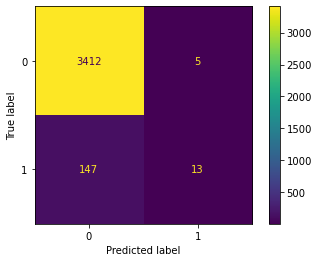

In [180]:
metrics.plot_confusion_matrix(dc,X_train,y_train)

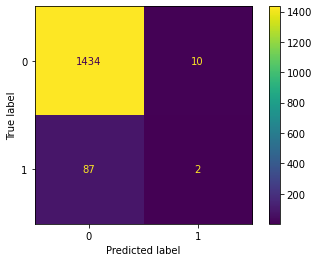

In [181]:
metrics.plot_confusion_matrix(dc,X_test,y_test)

In [182]:
metrics.roc_auc_score(y_test,y_pred)

0.5077733511780634

In [183]:
from sklearn import tree

In [184]:
import pydotplus

In [127]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=7bf80e58d5532d948f0970f91b2112cca6dc377d5c97ce550ecdfe77d7374b5b
  Stored in directory: c:\users\aayushi\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [128]:
import pydotplus

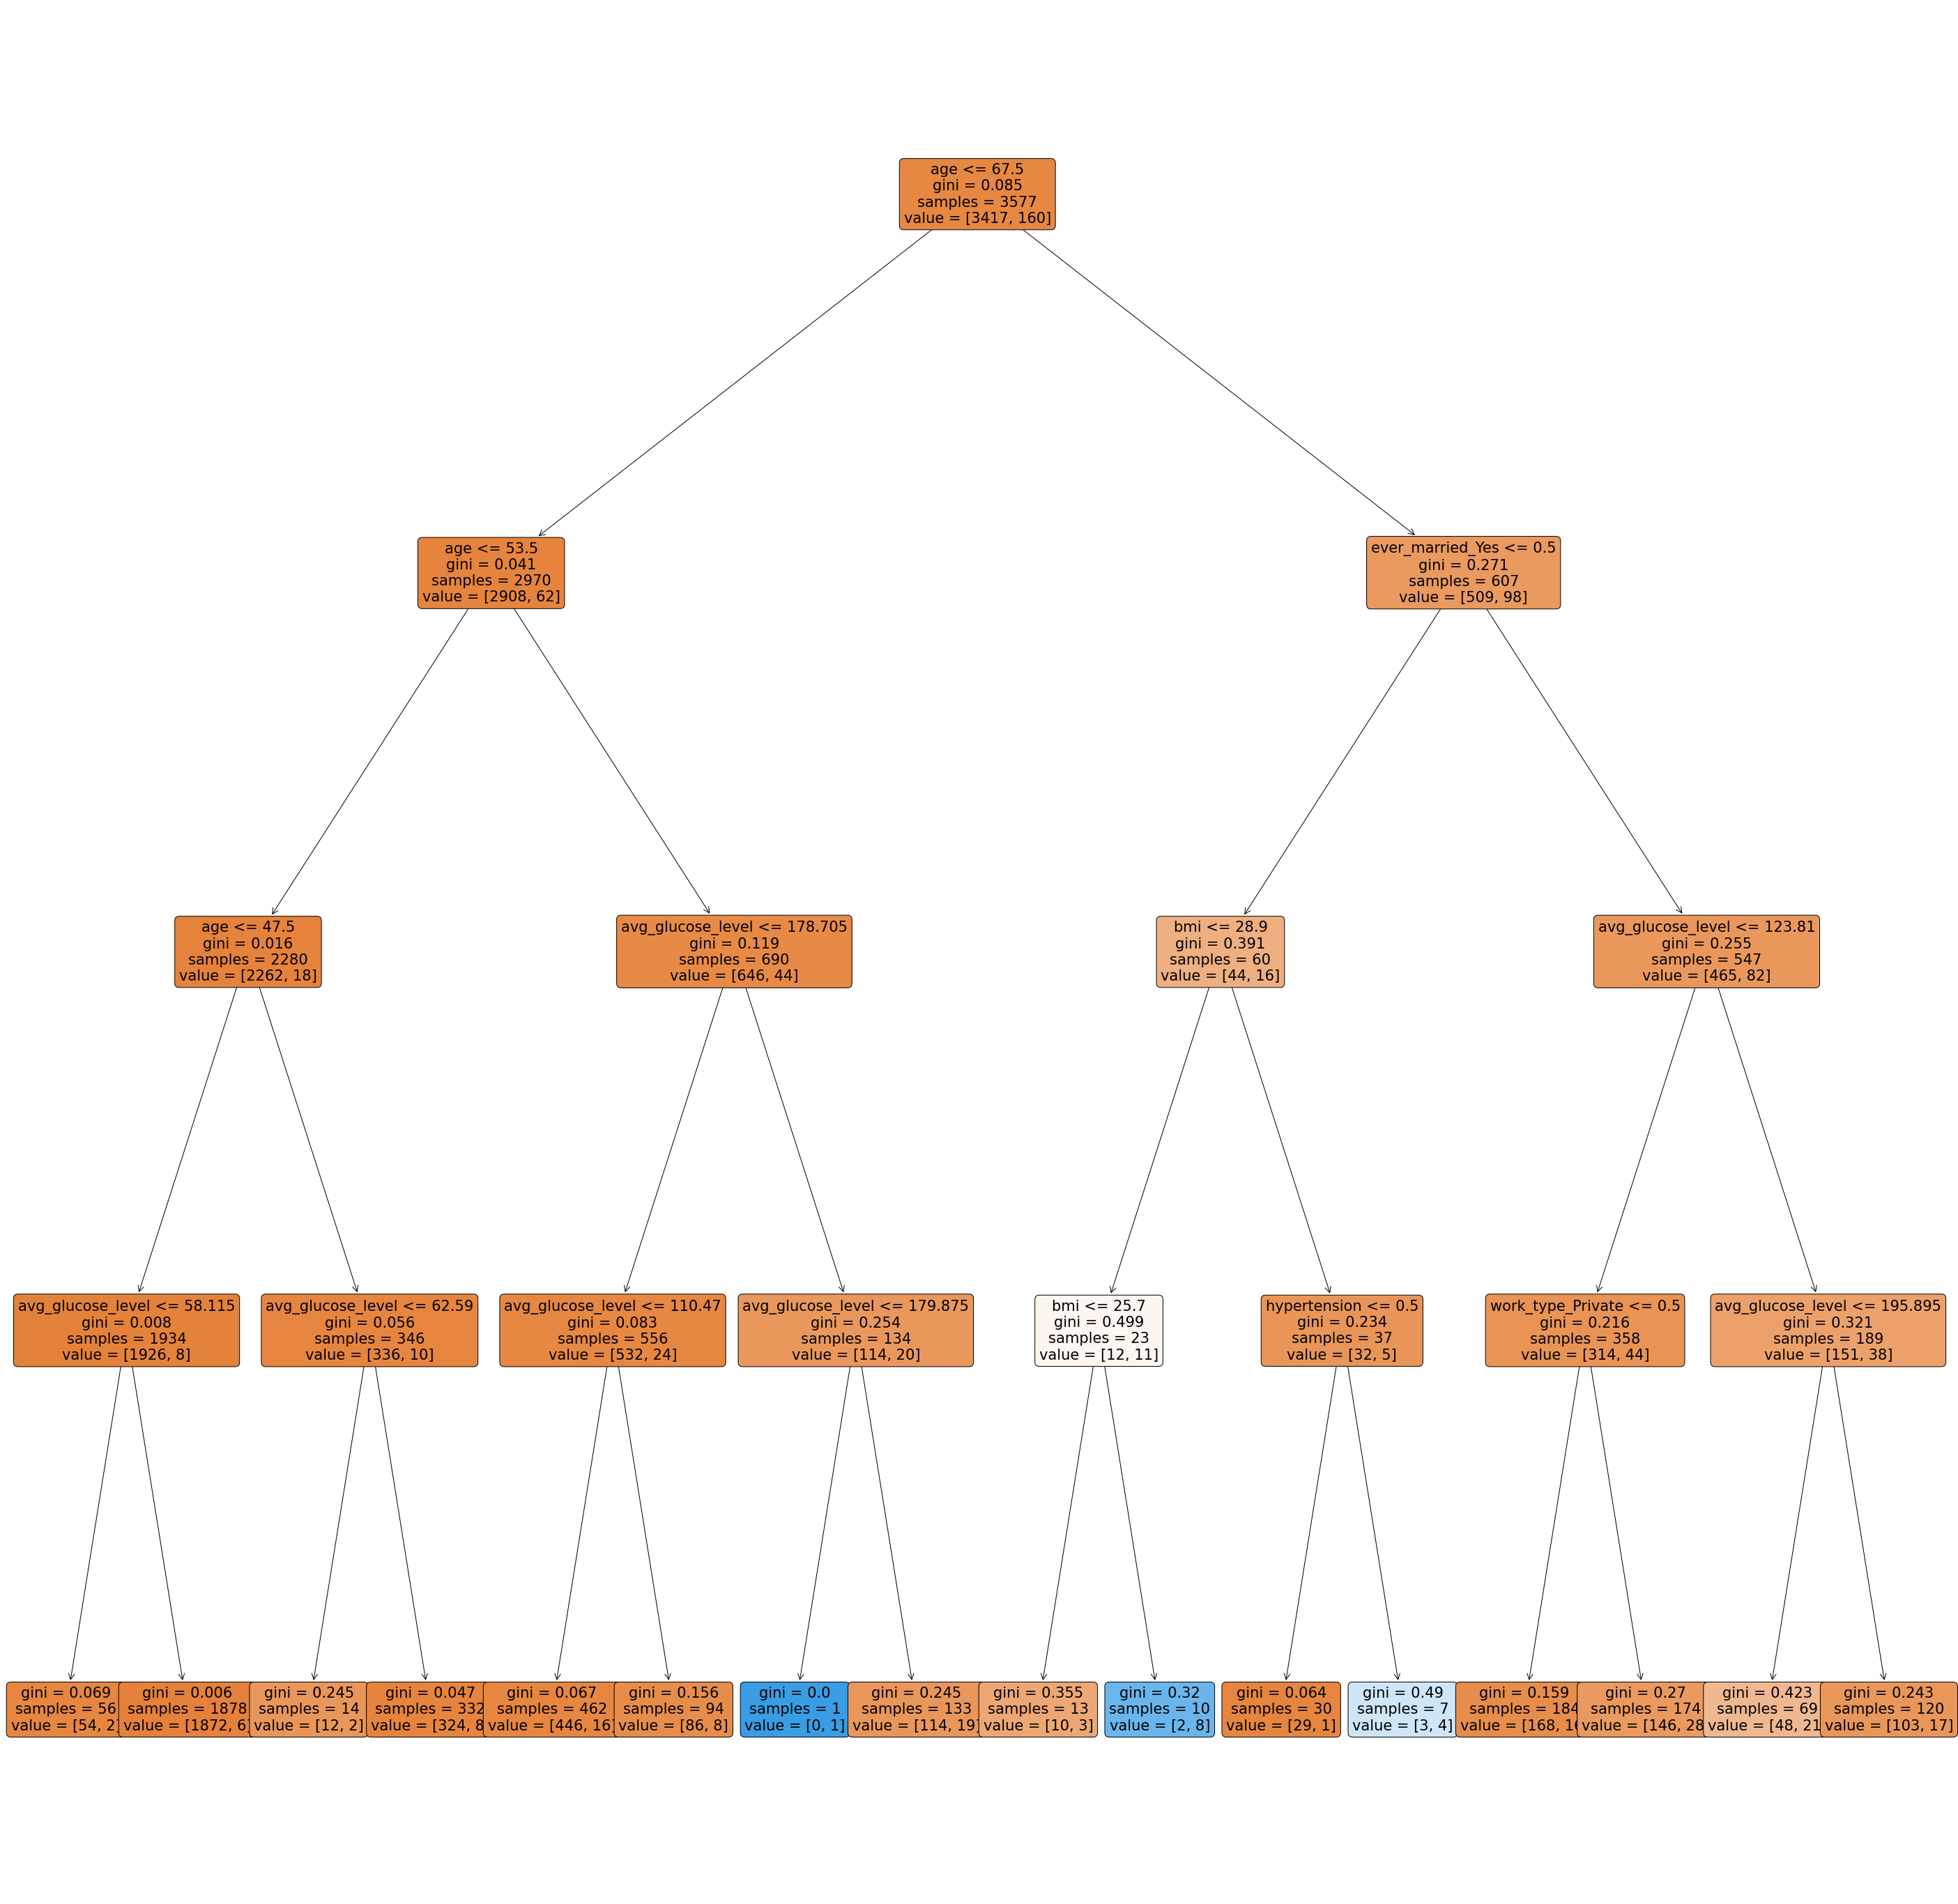

In [193]:
plt.figure(figsize=[50,50])
tree.plot_tree(dc,filled=True,fontsize=21,rounded=True,feature_names=x.columns)
plt.show()

In [196]:
from sklearn.model_selection import cross_val_score

In [209]:
cross_val_score(dc,x,y,cv=6,scoring='accuracy')

array([0.94953052, 0.95070423, 0.95070423, 0.95187793, 0.94594595,
       0.9506463 ])

In [210]:
cross_val_score(dc,x,y,cv=6,scoring='accuracy').min()

0.9459459459459459

In [211]:
cross_val_score(dc,x,y,cv=6,scoring='accuracy').max()

0.9518779342723005

In [212]:
cross_val_score(dc,x,y,cv=6,scoring='accuracy').mean()

0.9500973723263986